In [163]:
import pandas as pd
import networkx as nx
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import defaultdict
import matplotlib.pyplot as plt
import string

In [164]:
graph_df = pd.read_csv('/content/drive/MyDrive/DM/graph.csv')
content_df = pd.read_csv('/content/drive/MyDrive/DM/content.csv')

In [165]:
content_df

,URL,Title,Content
0,https://learnpython.com/introduction,Introduction to Python,Python is a versatile programming language use...
1,https://learnpython.com/basics,Python Basics,"The basics of Python include variables, loops,..."
2,https://aiworld.com/artificial-intelligence,What is Artificial Intelligence?,Artificial Intelligence (AI) refers to the sim...
3,https://aiworld.com/machine-learning,Understanding Machine Learning,Machine Learning (ML) is a subset of AI that e...
4,https://datasciencehub.com/overview,What is Data Science?,"Data Science combines statistics, programming,..."
5,https://datasciencehub.com/tools,Top Data Science Tools,Popular tools in data science include Jupyter ...
6,https://webdevworld.com/html-css,HTML and CSS Basics,HTML (HyperText Markup Language) is the standa...
7,https://webdevworld.com/javascript,Introduction to JavaScript,JavaScript is a programming language used to a...
8,https://blockchaininsights.com/technology,Understanding Blockchain Technology,Blockchain is a decentralized ledger technolog...
9,https://blockchaininsights.com/cryptocurrencies,Cryptocurrencies Explained,Cryptocurrencies are digital currencies built ...


In [166]:
source_col = graph_df.columns[0]
target_col = graph_df.columns[1]

In [167]:
G = nx.DiGraph()
for index, row in graph_df.iterrows():
    G.add_edge(row[source_col], row[target_col])

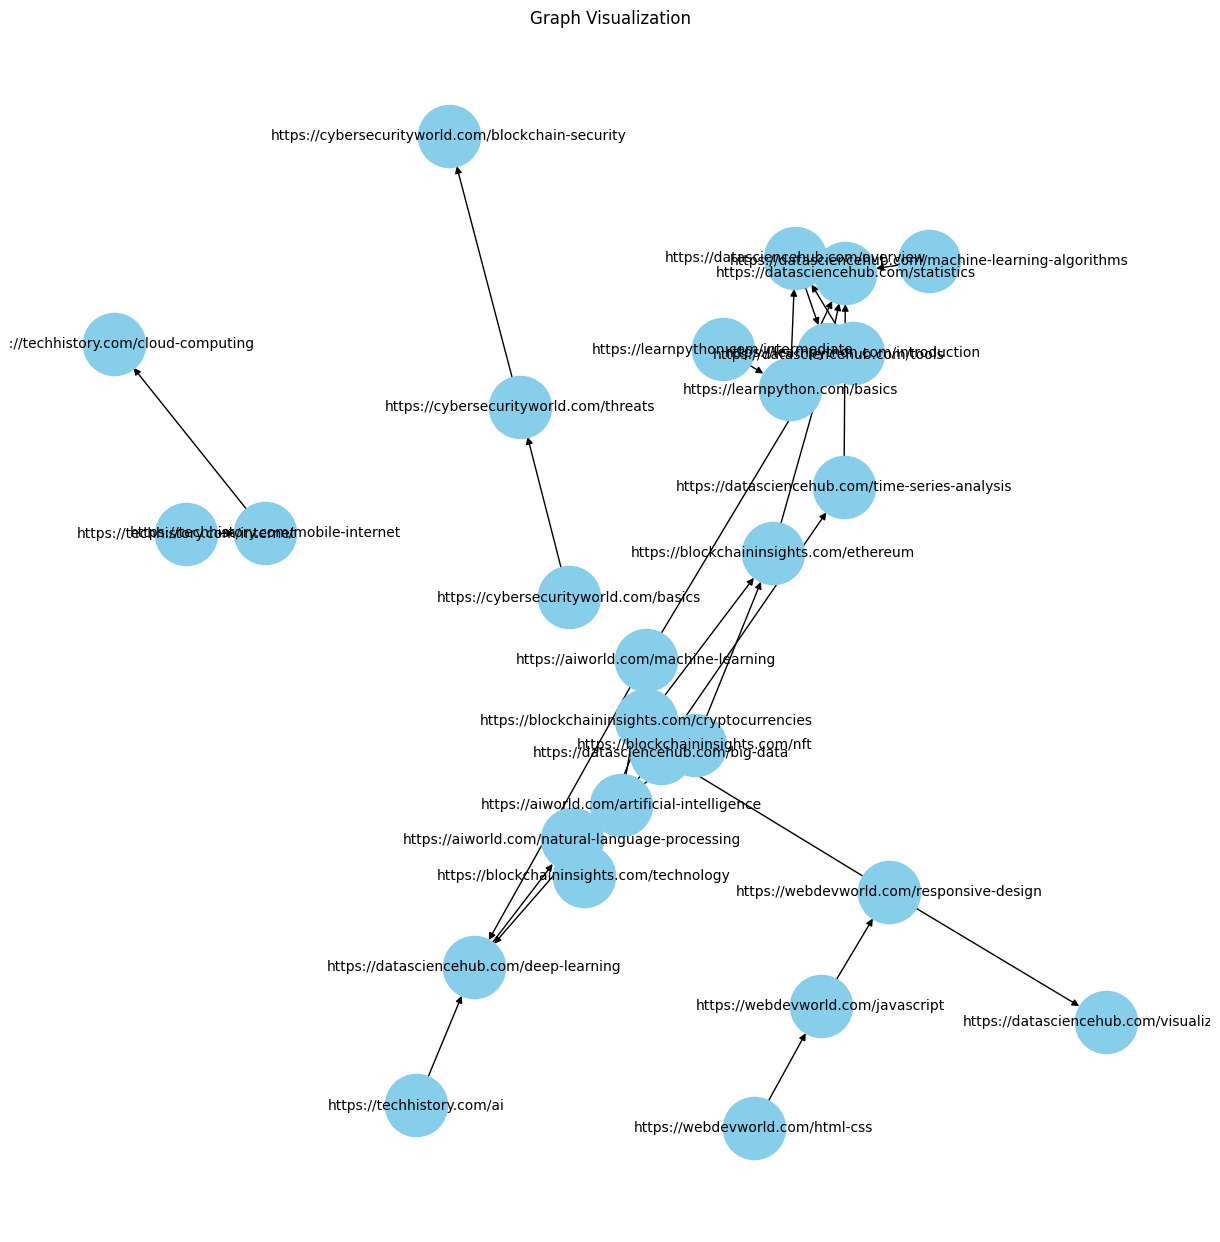

In [168]:
plt.figure(figsize=(12, 12))
nx.draw(G, with_labels=True, node_size=2000, node_color='skyblue', font_size=10, font_color='black')
plt.title("Graph Visualization")
plt.show()

In [169]:
nltk.download('punk')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Error loading punk: Package 'punk' not found in index
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [170]:
stop_words = set(stopwords.words('english'))
content_tokens = {}

for index, row in content_df.iterrows():
    tokens = word_tokenize(row['Content'].lower())
    filtered_tokens = [word for word in tokens if word.isalpha() and word.lower() not in stop_words]
    content_tokens[row['Content']] = filtered_tokens
print(content_tokens)


{'Python is a versatile programming language used in web development, data science, AI, and more. It is known for its simple syntax and powerful libraries such as NumPy, Pandas, and TensorFlow. Many developers prefer Python for its community support and ease of learning.': ['python', 'versatile', 'programming', 'language', 'used', 'web', 'development', 'data', 'science', 'ai', 'known', 'simple', 'syntax', 'powerful', 'libraries', 'numpy', 'pandas', 'tensorflow', 'many', 'developers', 'prefer', 'python', 'community', 'support', 'ease', 'learning'], 'The basics of Python include variables, loops, conditional statements, and functions. Python is an interpreted language, which means you can write and execute code interactively. Its flexibility makes it suitable for prototyping and production-level code.': ['basics', 'python', 'include', 'variables', 'loops', 'conditional', 'statements', 'functions', 'python', 'interpreted', 'language', 'means', 'write', 'execute', 'code', 'interactively', 

In [171]:
inverted_index = defaultdict(set)
for page, tokens in content_tokens.items():
    for token in tokens:
        inverted_index[token].add(page)


In [172]:
def single_word_search(query):
    if query in inverted_index:
        results = list(inverted_index[query])
        try:
            ranked_results = sorted(results, key=lambda x: pagerank.get(x, 0), reverse=True)
        except KeyError as e:
            print(f"KeyError: {e} not found in pagerank.")
            return []
        return ranked_results
    return []


In [173]:
def bag_of_words_search(query):
    words = query.lower().split()
    page_score = {}

    for word in words:
        if word in inverted_index:
            for page in inverted_index[word]:
                if page not in page_score:
                    page_score[page] = 0
                page_score[page] += 1

    valid_results = [page for page in page_score.keys() if page in pagerank]

    ranked_results = sorted(valid_results, key=lambda x: (page_score[x], pagerank.get(x, 0)), reverse=True)

    return ranked_results


In [174]:
print(single_word_search('python'))

['The basics of Python include variables, loops, conditional statements, and functions. Python is an interpreted language, which means you can write and execute code interactively. Its flexibility makes it suitable for prototyping and production-level code.', 'Popular tools in data science include Jupyter Notebooks, R, and Tableau. Python libraries like Pandas, Matplotlib, and Seaborn are essential for data manipulation and visualization. Cloud platforms like AWS and Google Cloud are often used for big data analysis.', 'Python is a versatile programming language used in web development, data science, AI, and more. It is known for its simple syntax and powerful libraries such as NumPy, Pandas, and TensorFlow. Many developers prefer Python for its community support and ease of learning.']
